<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#HC-mit-allen-Kategorien" data-toc-modified-id="HC-mit-allen-Kategorien-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>HC mit allen Kategorien</a></span><ul class="toc-item"><li><span><a href="#HC-mit-allen-Kategorien-(Sample-2,5%)" data-toc-modified-id="HC-mit-allen-Kategorien-(Sample-2,5%)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>HC mit allen Kategorien (Sample 2,5%)</a></span></li></ul></li><li><span><a href="#HC-nur-mit-Sport-und-Entertainment" data-toc-modified-id="HC-nur-mit-Sport-und-Entertainment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>HC nur mit Sport und Entertainment</a></span><ul class="toc-item"><li><span><a href="#HC-nur-mit-Sport-und-Entertainment-und-25%" data-toc-modified-id="HC-nur-mit-Sport-und-Entertainment-und-25%-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>HC nur mit Sport und Entertainment und 25%</a></span><ul class="toc-item"><li><span><a href="#Untersuchung-der-falschzugeordneten-Texte" data-toc-modified-id="Untersuchung-der-falschzugeordneten-Texte-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Untersuchung der falschzugeordneten Texte</a></span><ul class="toc-item"><li><span><a href="#Eintertainment-Texte-in-den-Sport-Clustern" data-toc-modified-id="Eintertainment-Texte-in-den-Sport-Clustern-3.1.1.1"><span class="toc-item-num">3.1.1.1&nbsp;&nbsp;</span>Eintertainment Texte in den Sport Clustern</a></span></li><li><span><a href="#Texte-aus-den-beiden-Sport-Clustern" data-toc-modified-id="Texte-aus-den-beiden-Sport-Clustern-3.1.1.2"><span class="toc-item-num">3.1.1.2&nbsp;&nbsp;</span>Texte aus den beiden Sport Clustern</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#HC-nur-mit-Tech-und-Sport-(5%)" data-toc-modified-id="HC-nur-mit-Tech-und-Sport-(5%)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>HC nur mit Tech und Sport (5%)</a></span></li><li><span><a href="#HC-nur-mit-Tech-und-Business-(5%)" data-toc-modified-id="HC-nur-mit-Tech-und-Business-(5%)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>HC nur mit Tech und Business (5%)</a></span></li><li><span><a href="#Cophenetic-Correlation-Coefficient" data-toc-modified-id="Cophenetic-Correlation-Coefficient-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Cophenetic Correlation Coefficient</a></span></li></ul></div>

# Imports

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import squareform
from sklearn.preprocessing import normalize
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../../Datensaetze/news_POS_POS_tags_nouns_adjectives_verb.csv")
df.head(5)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,415.0,244.0,quarterli profit at US media giant timewarn j...,"['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...",high fourth own fourth underlying exceptional ...,74.0,22.0,1.0
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,379.0,230.0,the dollar ha hit it highest level against th...,"['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...",late recent sanguine current current next shar...,66.0,30.0,9.0
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,258.0,168.0,the owner of embattl russian oil giant yuko a...,"['_SP', 'DT', 'NNS', 'IN', 'VBN', 'JJ', 'NN', ...",Russian former similar foreign Legal such real...,48.0,12.0,3.0
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,400.0,256.0,british airway ha blame high fuel price for a...,"['_SP', 'NNP', 'NNP', 'VBZ', 'VBN', 'JJ', 'NN'...",high pre - tax chief respectable third full la...,77.0,31.0,2.0
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,260.0,178.0,share in UK drink and food firm alli domecq h...,"['_SP', 'NNP', 'IN', 'NNP', 'NNS', 'CC', 'NN',...",French last major global top other Last LVMH b...,42.0,13.0,2.0


In [63]:
df[df['category'] == 'entertainment']

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
510,entertainment,001.txt,Gallery unveils interactive tree,A Christmas tree that can receive text messag...,186.0,128.0,A christma tree that can receiv text messag h...,"['_SP', 'DT', 'NNP', 'NN', 'WDT', 'MD', 'VB', ...",unwrapped responsible broken light 17th previo...,27.0,19.0,3.0
511,entertainment,002.txt,Jarre joins fairytale celebration,French musician Jean-Michel Jarre is to perfo...,249.0,169.0,french musician jean-michel jarr is to perfor...,"['_SP', 'JJ', 'NN', 'NNP', 'HYPH', 'NNP', 'NNP...",French Other coming Danish royal universal pur...,43.0,16.0,4.0
512,entertainment,003.txt,Musical treatment for Capra film,The classic film It's A Wonderful Life is to ...,187.0,119.0,the classic film It 's A wonder life is to be...,"['_SP', 'DT', 'JJ', 'NN', 'PRP', 'VBZ', 'DT', ...",classic Wonderful musical controversial musica...,27.0,12.0,2.0
513,entertainment,004.txt,Richard and Judy choose top books,The 10 authors shortlisted for a Richard and ...,208.0,148.0,the 10 author shortlist for a richard and jud...,"['_SP', 'DT', 'CD', 'NNS', 'VBD', 'IN', 'DT', ...",top Lovely top several last hard last successf...,36.0,10.0,3.0
514,entertainment,005.txt,Poppins musical gets flying start,The stage adaptation of children's film Mary ...,174.0,131.0,the stage adapt of children 's film mari popp...,"['_SP', 'DT', 'NN', 'NN', 'IN', 'NNS', 'POS', ...",lavish standing Technical comic unsuitable per...,35.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
891,entertainment,382.txt,Last Star Wars 'not for children',The sixth and final Star Wars movie may not b...,228.0,141.0,the sixth and final star war movi may not be ...,"['_SP', 'DT', 'JJ', 'CC', 'JJ', 'NNP', 'NNP', ...",sixth final suitable young violent old unsuita...,27.0,22.0,4.0
892,entertainment,383.txt,French honour for director Parker,British film director Sir Alan Parker has bee...,220.0,153.0,british film director sir alan parker ha been...,"['_SP', 'JJ', 'NN', 'NN', 'NNP', 'NNP', 'NNP',...",British cultural immense French modern former ...,32.0,10.0,7.0
893,entertainment,384.txt,Robots march to US cinema summit,Animated movie Robots has opened at the top o...,267.0,177.0,anim movi robot ha open at the top of the US ...,"['_SP', 'VBN', 'NN', 'NNS', 'VBZ', 'VBN', 'IN'...",first big recut last original new little origi...,42.0,13.0,0.0
894,entertainment,385.txt,Hobbit picture 'four years away',Lord of the Rings director Peter Jackson has ...,256.0,156.0,lord of the ring director peter jackson ha sa...,"['_SP', 'NNP', 'IN', 'DT', 'NNPS', 'NN', 'NNP'...",lengthy major further old Australian undisclos...,35.0,10.0,2.0


# HC mit allen Kategorien

In [4]:
tf_idf_vectorizor = TfidfVectorizer(max_features=1000,
                                    stop_words="english")

tf_idf = tf_idf_vectorizor.fit_transform(df.content)
tf_idf_norm = normalize(tf_idf)
#tf_idf_norm = tf_idf_norm.fillna(0)
tf_idf_array = tf_idf_norm.toarray()

In [5]:
def linkage_matrix(n_samples, children, distances):
    """
    create a linkage matrix for the dendogram method in scipy
    n_samples: int, number of samples
    children: list of lists, clustered data points (should be 2)
    distances: list of distances between nodes
    """
    # Create linkage matrix
    

    # create the counts of samples under each node
    counts = np.zeros(children.shape[0])
    for i, merge in enumerate(children):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    return np.column_stack([children, distances, counts]).astype(float)

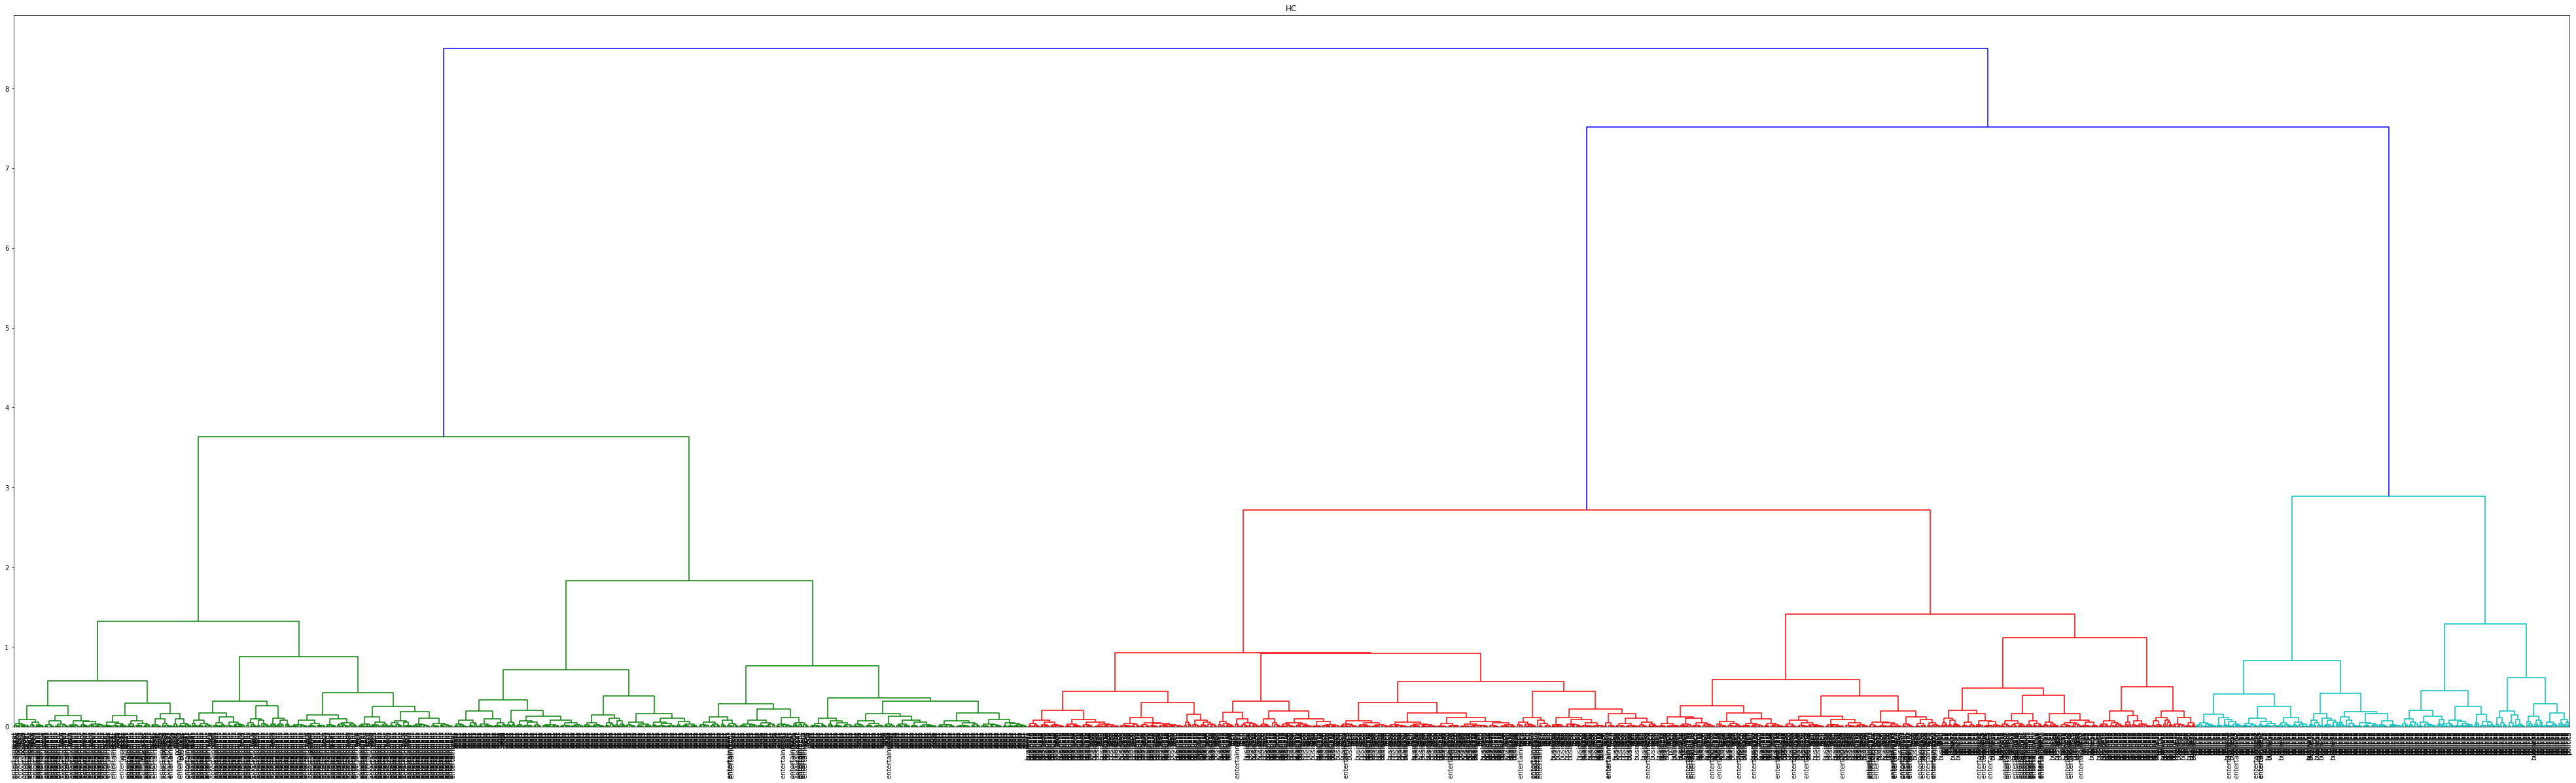

In [6]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(Y_sklearn)
link_matrix = linkage_matrix(Y_sklearn.shape[0], model.children_, model.distances_)
plt.figure(figsize=(70,20))
plt.title('HC')

dendrogram(link_matrix, labels = df.category.values, leaf_font_size=10);
#plt.savefig('..', bbox_inches = "tight")

## HC mit allen Kategorien (Sample 2,5%)

In [96]:
df_sample = df.copy()
df_sample = df_sample.sample(frac=.025, replace=False, random_state=42)
df_sample.shape

(56, 12)

In [97]:
from collections import Counter

Counter(df_sample.category)

Counter({'business': 18,
         'sport': 12,
         'politics': 8,
         'entertainment': 10,
         'tech': 8})

In [98]:
tf_idf_vectorizor = TfidfVectorizer()

tf_idf = tf_idf_vectorizor.fit_transform(df_sample.content)
tf_idf_norm = normalize(tf_idf)
#tf_idf_norm = tf_idf_norm.fillna(0)
tf_idf_array = tf_idf_norm.toarray()

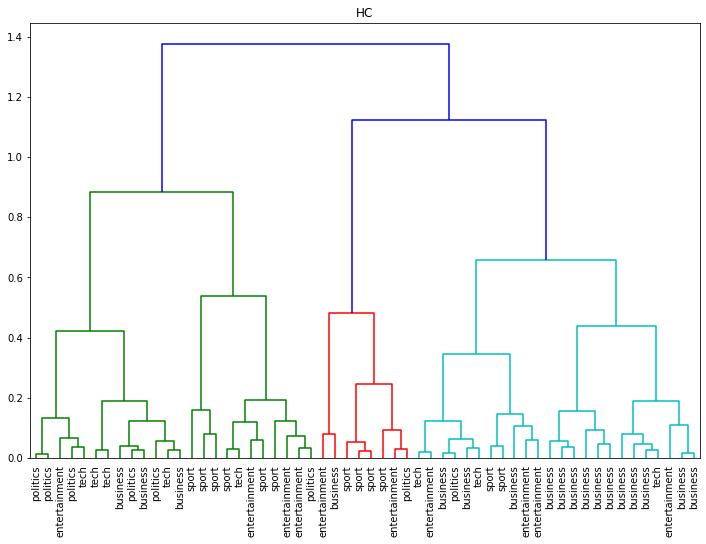

In [102]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(Y_sklearn)
link_matrix = linkage_matrix(Y_sklearn.shape[0], model.children_, model.distances_)
plt.figure(figsize=(12,8))
plt.title('HC')

dendrogram(link_matrix, labels = df_sample.category.values, leaf_font_size=10);
plt.savefig('../../Bilder/HC/HC_PCA_2.5_percent_all_categorys.png', bbox_inches = "tight")

# HC nur mit Sport und Entertainment

In [12]:
data1 = df[df['category'] == 'sport']
data2 = df[df['category'] == 'entertainment']

In [13]:
data = pd.concat([data1, data2], axis = 0)

tf_idf_vectorizor = TfidfVectorizer(max_features=1000,
                                    stop_words="english")

tf_idf = tf_idf_vectorizor.fit_transform(data.content)
tf_idf_norm = normalize(tf_idf)
#tf_idf_norm = tf_idf_norm.fillna(0)
tf_idf_array = tf_idf_norm.toarray()

In [14]:
data

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
1313,sport,001.txt,Claxton hunting first major medal,British hurdler Sarah Claxton is confident sh...,206.0,145.0,british hurdler sarah claxton is confid she c...,"['_SP', 'JJ', 'NN', 'NNP', 'NNP', 'VBZ', 'JJ',...",British confident first major next old British...,29.0,22.0,5.0
1314,sport,002.txt,O'Sullivan could run in Worlds,Sonia O'Sullivan has indicated that she would...,139.0,103.0,sonia o'sullivan ha indic that she would like...,"['_SP', 'NNP', 'NNP', 'VBZ', 'VBN', 'IN', 'PRP...",next old official Provincial last present firs...,16.0,9.0,2.0
1315,sport,003.txt,Greene sets sights on world title,Maurice Greene aims to wipe out the pain of l...,371.0,229.0,mauric green aim to wipe out the pain of lose...,"['_SP', 'NNP', 'NNP', 'VBZ', 'TO', 'VB', 'RP',...",fourth fellow semi semi - final final alone ab...,42.0,16.0,5.0
1316,sport,004.txt,IAAF launches fight against drugs,The IAAF - athletics' world governing body - ...,190.0,132.0,the iaaf - athlet ' world govern bodi - ha me...,"['_SP', 'DT', 'NNP', 'HYPH', 'NNS', 'POS', 'NN...",anti - doping - happy clean world body fight s...,31.0,6.0,3.0
1317,sport,005.txt,"Dibaba breaks 5,000m world record",Ethiopia's Tirunesh Dibaba set a new world re...,156.0,118.0,ethiopia 's tirunesh dibaba set a new world r...,"['_SP', 'NNP', 'POS', 'NNP', 'NNP', 'VBD', 'DT...",new previous indoor Ethiopian last compatriot ...,18.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
891,entertainment,382.txt,Last Star Wars 'not for children',The sixth and final Star Wars movie may not b...,228.0,141.0,the sixth and final star war movi may not be ...,"['_SP', 'DT', 'JJ', 'CC', 'JJ', 'NNP', 'NNP', ...",sixth final suitable young violent old unsuita...,27.0,22.0,4.0
892,entertainment,383.txt,French honour for director Parker,British film director Sir Alan Parker has bee...,220.0,153.0,british film director sir alan parker ha been...,"['_SP', 'JJ', 'NN', 'NN', 'NNP', 'NNP', 'NNP',...",British cultural immense French modern former ...,32.0,10.0,7.0
893,entertainment,384.txt,Robots march to US cinema summit,Animated movie Robots has opened at the top o...,267.0,177.0,anim movi robot ha open at the top of the US ...,"['_SP', 'VBN', 'NN', 'NNS', 'VBZ', 'VBN', 'IN'...",first big recut last original new little origi...,42.0,13.0,0.0
894,entertainment,385.txt,Hobbit picture 'four years away',Lord of the Rings director Peter Jackson has ...,256.0,156.0,lord of the ring director peter jackson ha sa...,"['_SP', 'NNP', 'IN', 'DT', 'NNPS', 'NN', 'NNP'...",lengthy major further old Australian undisclos...,35.0,10.0,2.0


In [15]:
def linkage_matrix(n_samples, children, distances):
    """
    create a linkage matrix for the dendogram method in scipy
    n_samples: int, number of samples
    children: list of lists, clustered data points (should be 2)
    distances: list of distances between nodes
    """
    # Create linkage matrix
    

    # create the counts of samples under each node
    counts = np.zeros(children.shape[0])
    for i, merge in enumerate(children):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    return np.column_stack([children, distances, counts]).astype(float)

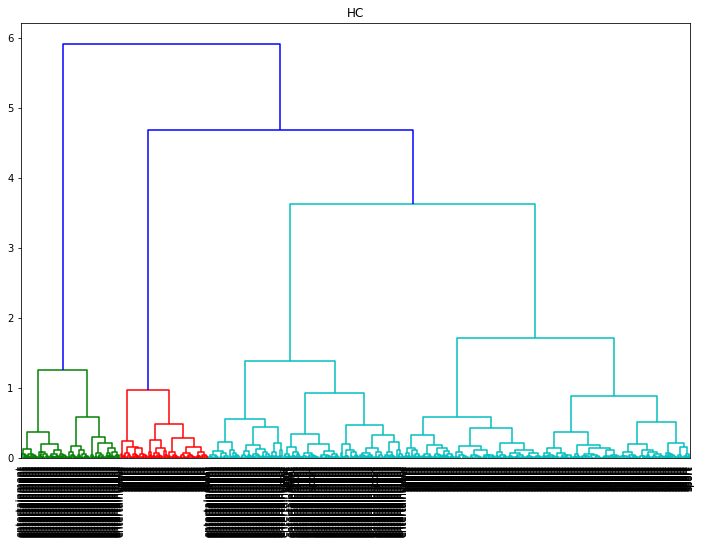

In [17]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(Y_sklearn)
link_matrix = linkage_matrix(Y_sklearn.shape[0], model.children_, model.distances_)
plt.figure(figsize=(12,8))
plt.title('HC')

dendrogram(link_matrix, labels = data.category.values, leaf_font_size=10);
#plt.savefig('../../Bilder/HC/HC_Sport_Entertainment.png', bbox_inches = "tight")

In [18]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'ro', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

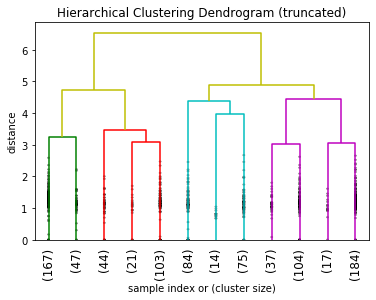

In [19]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(tf_idf_array)
link_matrix = linkage_matrix(tf_idf_array.shape[0], model.children_, model.distances_)
fancy_dendrogram(
    link_matrix,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    above_threshold_color='y',
    show_contracted=True,
    annotate_above=10  # useful in small plots so annotations don't overlap
)
#plt.savefig('../images/HC/hc_latin_hiphop.png', bbox_inches = "tight")
plt.show()

## HC nur mit Sport und Entertainment und 25%

In [20]:
data_sample = data.copy()
data_sample = data_sample.sample(frac=.05, replace=False, random_state=42)
data_sample.shape

(45, 12)

In [31]:
data_sample.head(2)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
1644,sport,332.txt,Harinordoquy suffers France axe,Number eight Imanol Harinordoquy has been dro...,337.0,214.0,number eight imanol harinordoquy ha been drop...,"['_SP', 'NN', 'CD', 'NNP', 'NNP', 'VBZ', 'VBN'...",second last second last second poor last fast ...,33.0,15.0,7.0
637,entertainment,128.txt,Top gig award for Scissor Sisters,New York band Scissor Sisters have won a gig ...,205.0,139.0,new york band scissor sister have won a gig o...,"['_SP', 'NNP', 'NNP', 'NN', 'NNP', 'NNPS', 'VB...",top quirky amazing original eccentric British ...,34.0,8.0,4.0


In [21]:
tf_idf_vectorizor = TfidfVectorizer(max_features=1000,
                                    stop_words="english")

tf_idf = tf_idf_vectorizor.fit_transform(data_sample.content)
tf_idf_norm = normalize(tf_idf)
#tf_idf_norm = tf_idf_norm.fillna(0)
tf_idf_array = tf_idf_norm.toarray()

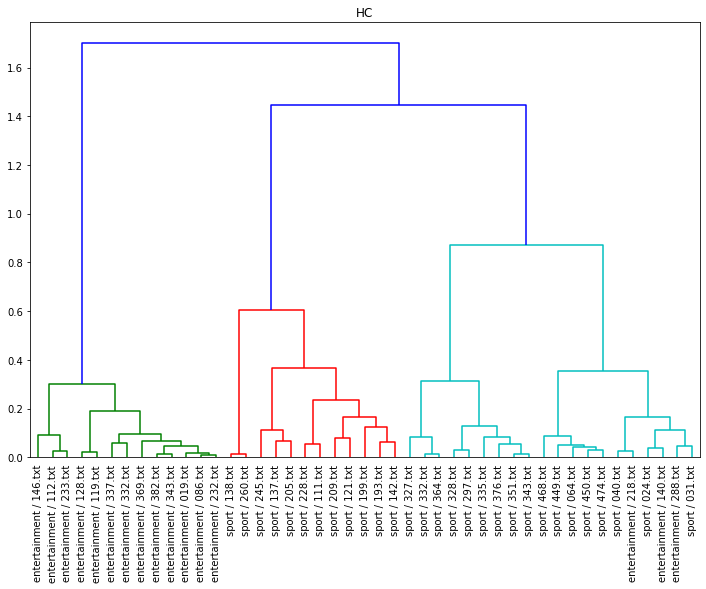

In [86]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(Y_sklearn)
link_matrix = linkage_matrix(Y_sklearn.shape[0], model.children_, model.distances_)
plt.figure(figsize=(12,8))
plt.title('HC')

dendrogram(link_matrix, labels = (data_sample['category'].values + ' ' + '/' + ' ' + data_sample['filename'].values), 
           leaf_font_size=10);
plt.savefig('../../Bilder/HC/HC_Sport_Entertainment_25_percent_filenames.png', bbox_inches = "tight")

### Untersuchung der falschzugeordneten Texte

#### Eintertainment Texte in den Sport Clustern

In [82]:
Text218 = data_sample[data_sample['filename']  ==  '218.txt']
List1 = Text218.content.tolist()
List1

[' Controversial DJ Howard Stern has been dropped from four US radio stations because he keeps promoting his move to a network broadcasting on satellite.  Cidatel Broadcasting said Stern had transformed his show into a "continuous infomercial promoting Sirius, his new satellite radio employer". Stern will join the Sirius subscription service, which is not governed by US regulators, next year. Citadel pulled Stern\'s show from stations in New York and Pennsylvania. Stern had been holiday for two weeks but his show did not return to the four stations as expected on 3 January. Citadel said it did not yet know whether it would return to its network.  Stern announced in October that he was leaving conventional radio, where his syndicated show goes out across the US, for the relatively restriction-free satellite service. The DJ\'s broadcasts are well known for landing in trouble with regulators for obscene and sexually explicit rantings. Stern was dropped by six stations owned by media giant

In [83]:
Text140 = data_sample[data_sample['filename']  ==  '140.txt']
List2 = Text140.content.tolist()
List2

[' U2 have smashed Irish box office records with ticket sales for their Dublin concerts, after more than 150,000 were sold within 50 minutes.  Tickets for the two concerts at the city\'s Croke Park stadium were released at 8am on Friday morning. "Nothing like it has ever been seen in Ireland before," said Justin Green, spokesman for organisers MCD Promoters. "We could have sold a million tickets." The Dublin dates on June 24 and 25 form part of the worldwide Vertigo tour. The tour begins in San Diego on 28 March and will cover 13 US cities. The band will also play 24 European gigs, finishing in Lisbon in August.  Mr Green said that ticket outlets had been "bombarded" by U2 fans. "Unfortunately there\'s thousands and thousands of disappointed fans all over the country which is disappointing, but there\'s only two dates confirmed," he said. Many fans camped on the streets of the Irish capital for three days to ensure they were first in line at Ticketmaster in St Stephen\'s Green Shopping

In [84]:
Text288 = data_sample[data_sample['filename']  ==  '288.txt']
List3 = Text288.content.tolist()
List3

[' Rapper 50 Cent has ended his public feud with his protege The Game as the pair said they wanted to be good role models for their communities.  The row blew up when 50 Cent threw The Game out of his G-Unit crew and accused him of being disloyal. A member of The Game\'s entourage was reportedly shot outside a radio station where 50 Cent was being interviewed. But the pair shook hands as they handed over money to music projects for New York\'s deprived areas on Wednesday.  The Game, whose real name is Jayceon Taylor, told a news conference: "I want to apologise. I\'m almost ashamed to have participated in the things that went on over the last few weeks." Chart-topper 50 Cent, real name Curtis Jackson, said the truce came on the anniversary of the death of the Notorious BIG in 1997, who was part of a volatile feud between the east and west coast rap scenes. "We\'re here today to show that people can rise above the most difficult circumstances and together we can put negativity behind us

#### Texte aus den beiden Sport Clustern

In [87]:
Text228 = data_sample[data_sample['filename']  ==  '228.txt']
List4 = Text228.content.tolist()
List4

[' Former Liverpool manager Gerard Houllier has praised the work of his Anfield successor Rafael Benitez.  Houllier was angry at reports that he has been critical of Benitez since the Spaniard took over at Liverpool. But Houllier told BBC Sport: "In private and in public, I have stressed I believe Rafa is doing a good job. He is the right man at the right place. "Rafa is a good coach and a good man. I\'ve spoken to him since he has been at Liverpool and never criticised him." Houllier also revealed he is now ready to return to the game after leaving Liverpool in May following six years at Anfield.  The former France boss has been linked with a host of jobs and pulled out of the race to succeed Mark Hughes as Wales national coach. He has been working for Uefa, covering the Premiership for French television and also coaching in Brazil with national coach Carlos Alberto Perreira. Houllier said: "If a good club comes up at the right time then yes, I am ready to come back. "It has been inte

In [95]:
Text328 = data_sample[data_sample['filename']  ==  '328.txt']
List5 = Text328.content.tolist()
List5

[' All Blacks captain Tama Umaga has warned the British and Irish Lions will be his most fearsome opponents yet ahead of their summer tour.  But Umaga, in England for Saturday\'s IRB Rugby Aid match, also backed New Zealand to win the three-Test series against the Lions. He told BBC Sport: "It\'s potentially the most fearsome line-up I\'ve ever come up against. They\'re awesome. "But I\'d back us all the way to beat them when they come over." Lions boss Sir Clive Woodward is set to announce his squad for the June-July tour next month.  When Woodward was appointed last year, it was widely believed he would rely heavily on his former England players. But Umaga said: "He\'d be hard pushed to do that now considering the shape of the Six Nations. "Don\'t get me wrong, England have got a lot of talented guys and I\'m sure there are some of them who\'ll make the Lions Test XV. "But you can\'t disguise Wales and Ireland in particular. Some of the tries they\'ve scored have been great. I\'ll ad

Rot: Fast ausschließlich Fußballartikel 
Blau: Verschiedene Sportarten (Rugby & Leichtathletik)

# HC nur mit Tech und Sport (5%)

In [31]:
data1 = df[df['category'] == 'sport']
data2 = df[df['category'] == 'tech']

In [32]:
data = pd.concat([data1, data2], axis = 0)

data_sample = data.copy()
data_sample = data_sample.sample(frac=.05, replace=False, random_state=42)
data_sample.shape

(46, 12)

In [33]:
from collections import Counter

Counter(data_sample.category)

Counter({'tech': 24, 'sport': 22})

In [34]:
tf_idf_vectorizor = TfidfVectorizer(max_features=1000,
                                    stop_words="english")

tf_idf = tf_idf_vectorizor.fit_transform(data_sample.content)
tf_idf_norm = normalize(tf_idf)
#tf_idf_norm = tf_idf_norm.fillna(0)
tf_idf_array = tf_idf_norm.toarray()

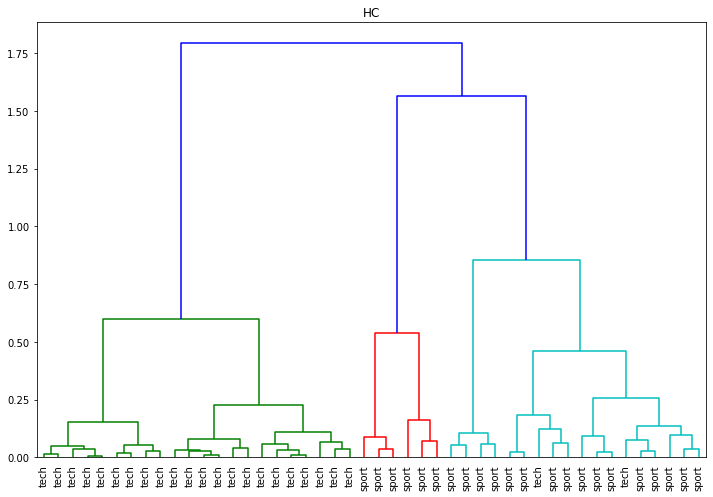

In [36]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(Y_sklearn)
link_matrix = linkage_matrix(Y_sklearn.shape[0], model.children_, model.distances_)
plt.figure(figsize=(12,8))
plt.title('HC')

dendrogram(link_matrix, labels = data_sample.category.values, leaf_font_size=10);
#plt.savefig('../../Bilder/HC/HC_PCA_Sport_Tech_5_percent.png', bbox_inches = "tight")

# HC nur mit Tech und Business (5%)

In [5]:
data1 = df[df['category'] == 'business']
data2 = df[df['category'] == 'tech']

In [6]:
data = pd.concat([data1, data2], axis = 0)

data_sample = data.copy()
data_sample = data_sample.sample(frac=.05, replace=False, random_state=42)
data_sample.shape

(46, 12)

In [7]:
from collections import Counter

Counter(data_sample.category)

Counter({'tech': 24, 'business': 22})

In [8]:
tf_idf_vectorizor = TfidfVectorizer(max_features=1000,
                                    stop_words="english")

tf_idf = tf_idf_vectorizor.fit_transform(data_sample.content)
tf_idf_norm = normalize(tf_idf)
#tf_idf_norm = tf_idf_norm.fillna(0)
tf_idf_array = tf_idf_norm.toarray()

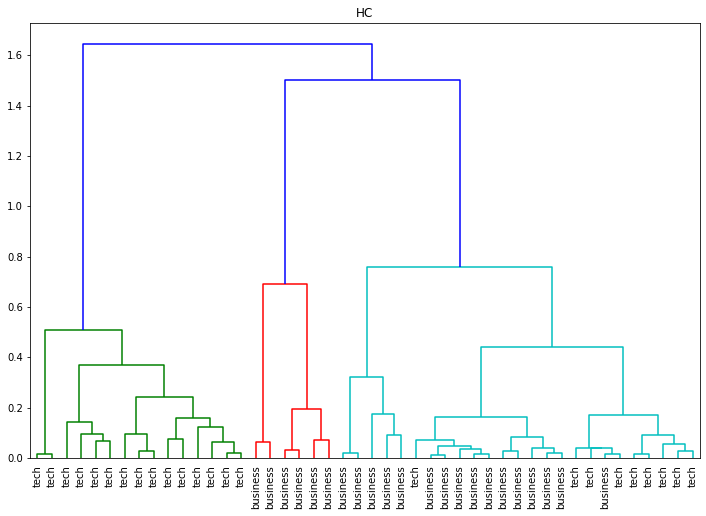

In [13]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(Y_sklearn)
link_matrix = linkage_matrix(Y_sklearn.shape[0], model.children_, model.distances_)
plt.figure(figsize=(12,8))
plt.title('HC')

dendrogram(link_matrix, labels = data_sample.category.values, leaf_font_size=10);
#plt.savefig('../../Bilder/HC/HC_PCA_Business_Tech_5_percent.png', bbox_inches = "tight")

# Cophenetic Correlation Coefficient

Die tatsächlichen paarweisen Abstände aller Proben werden mit den durch die hierarchische Clusterung implizierten Abstände verglichen (korreliert). Je näher der Wert bei 1 liegt, desto besser bewahrt das Clustering die ursprünglichen Abstände. 

In [14]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(link_matrix, pdist(Y_sklearn))
c

0.6556807400040547